In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('6061_thermal_expansion - Sheet1.csv')

In [5]:
df.head(5)

,alloy,temp,thermal expansion(mm/mm)
0,6061.0,25.84389,0.00004
1,NaN,29.53586,0.00006
2,NaN,33.75528,0.00010
3,NaN,39.55696,0.00012
4,NaN,43.77637,0.00015


In [6]:
df.shape

(113, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   alloy                     1 non-null      float64
 1   temp                      113 non-null    float64
 2   thermal expansion(mm/mm)  113 non-null    float64
dtypes: float64(3)
memory usage: 2.8 KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

alloy                       112
temp                          0
thermal expansion(mm/mm)      0
dtype: int64

In [10]:
df.drop('alloy',axis='columns',inplace=True)

In [11]:
df.head(5)

,temp,thermal expansion(mm/mm)
0,25.84389,0.00004
1,29.53586,0.00006
2,33.75528,0.00010
3,39.55696,0.00012
4,43.77637,0.00015


In [12]:
df.dtypes

temp                        float64
thermal expansion(mm/mm)    float64
dtype: object

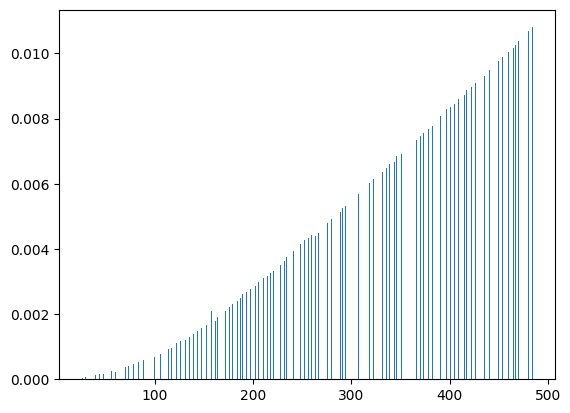

In [13]:
bars = plt.bar(df['temp'],df['thermal expansion(mm/mm)'])

plt.show()

In [14]:
cols_to_scale = ['temp']

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [16]:
df.sample(5)

,temp,thermal expansion(mm/mm)
43,0.384350,0.00287
4,0.039125,0.00015
104,0.925201,0.00976
61,0.525892,0.00449
55,0.475259,0.00401


In [17]:
df.corr()['thermal expansion(mm/mm)']

temp                        0.993526
thermal expansion(mm/mm)    1.000000
Name: thermal expansion(mm/mm), dtype: float64

In [18]:
 x = df.drop('thermal expansion(mm/mm)',axis=1)
 y = df['thermal expansion(mm/mm)']

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(x_test)

In [24]:
r2_score(y_test,y_pred)

0.9883046873663314

In [25]:
lr.score(x_train, y_train)

0.9863317223783646

In [26]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_error

In [32]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt,yt,yp,disp="on"):
    ''' Take the different set of parameter and prints evaluation metrics '''
    MSE=round(mean_squared_error(y_true=yt,y_pred=yp),4)
    RMSE=(np.sqrt(MSE))
    R2=(r2_score(y_true=yt,y_pred=yp))
    Adjusted_R2=(1-(1-r2_score(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
    if disp=="on":
        print("MSE :",MSE,"RMSE :", RMSE)
        print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)
    
    #Plotting Actual and Predicted Values
    plt.figure(figsize=(18,6))
    plt.plot((yp)[:100]) 
    plt.plot((np.array(yt)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.title('Actual and Predicted thermal expansion')
    
    return (MSE,RMSE,R2,Adjusted_R2) 

MSE : 0.0 RMSE : 0.0
R2 : 0.9863317223783646 Adjusted R2 : 0.9861764010417552


(0.0, 0.0, 0.9863317223783646, 0.9861764010417552)

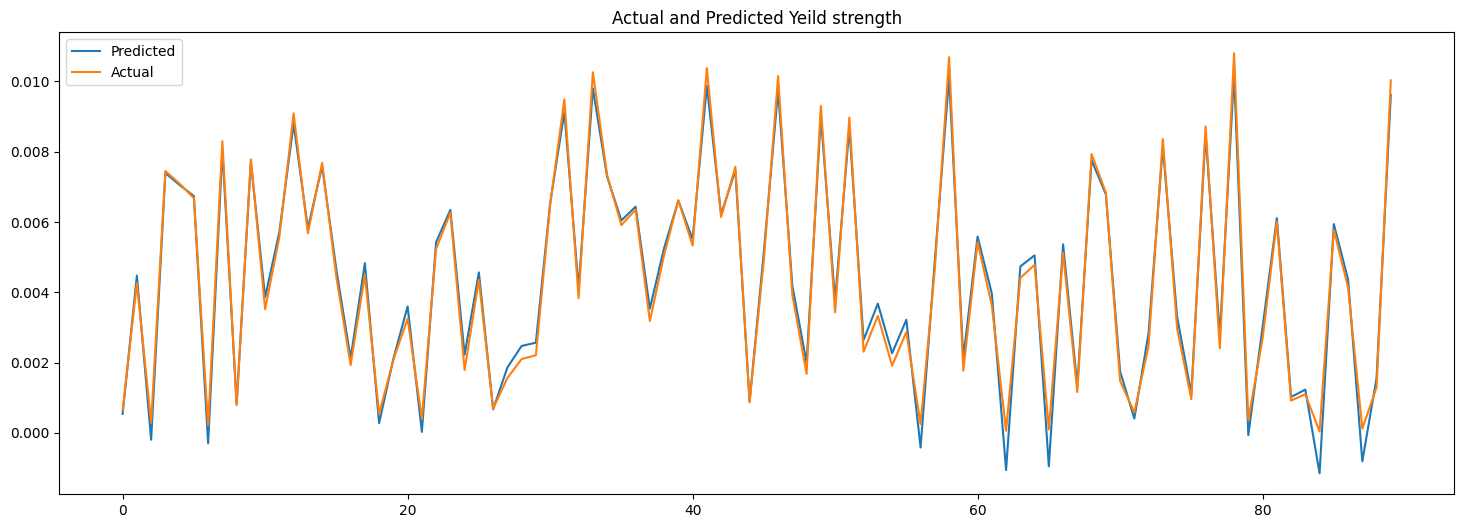

In [33]:
EvaluationMetric(x_train,y_train,y_pred_train)

MSE : 0.0 RMSE : 0.0
R2 : 0.9883046873663314 Adjusted R2 : 0.987747767717109


(0.0, 0.0, 0.9883046873663314, 0.987747767717109)

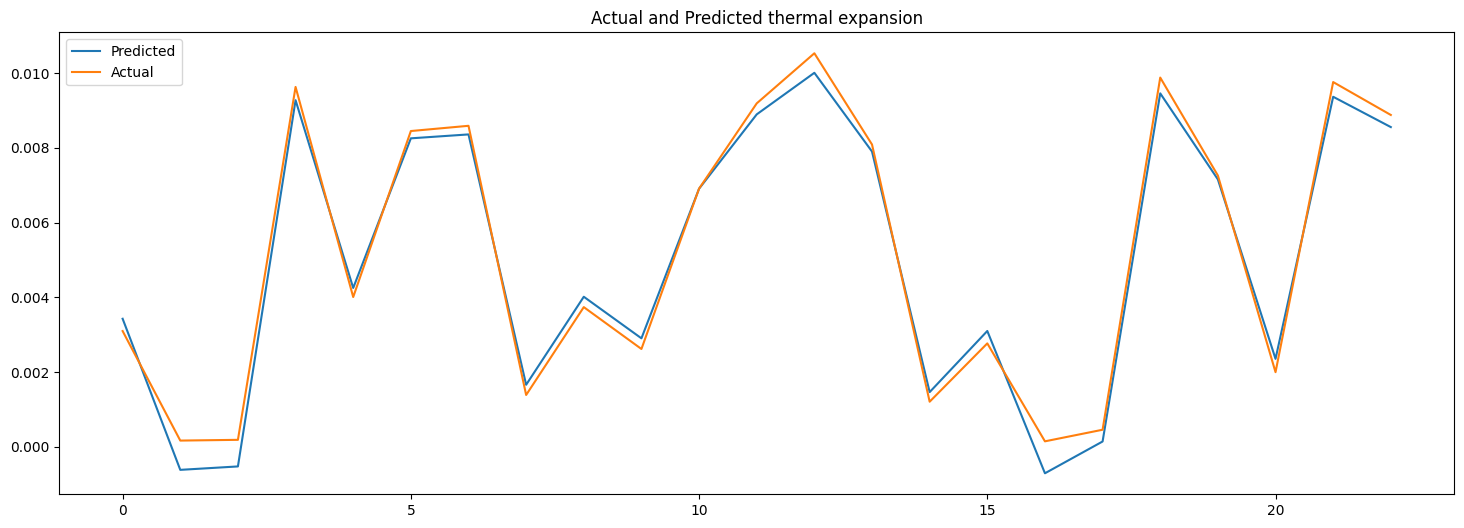

In [28]:
EvaluationMetric(x_test,y_test,y_pred_test)

In [29]:
intercept = lr.intercept_
coefficients = lr.coef_

print("Intercept: ", intercept)
print("Coefficients: ", coefficients)

Intercept:  -0.0011492752840765192
Coefficients:  [0.01136609]


In [42]:
b = lr.predict([[0.917146	]])

C:\Users\prakhar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
b

array([0.00927509])

In [44]:
original_b = scaler.inverse_transform([b])

In [45]:
original_b

array([[30.09497271]])